In [1]:
!pip install pandas

In [2]:
#Importing Libraries
import pandas as pd
from keras.models import load_model
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf 
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [3]:
# Download historical stock price data for Apple Inc. (AAPL) from Yahoo Finance
df = yf.download('AAPL',start='2012-01-01', end='2019-08-18')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433824,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771561,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2019-08-12,49.904999,50.512501,49.787498,50.119999,48.620312,89927600
2019-08-13,50.255001,53.035000,50.119999,52.242500,50.679302,188874000
2019-08-14,50.790001,51.610001,50.647499,50.687500,49.170826,146189600


In [4]:
# Check the shape (number of rows and columns) of the downloaded DataFrame.
df.shape

(1918, 6)

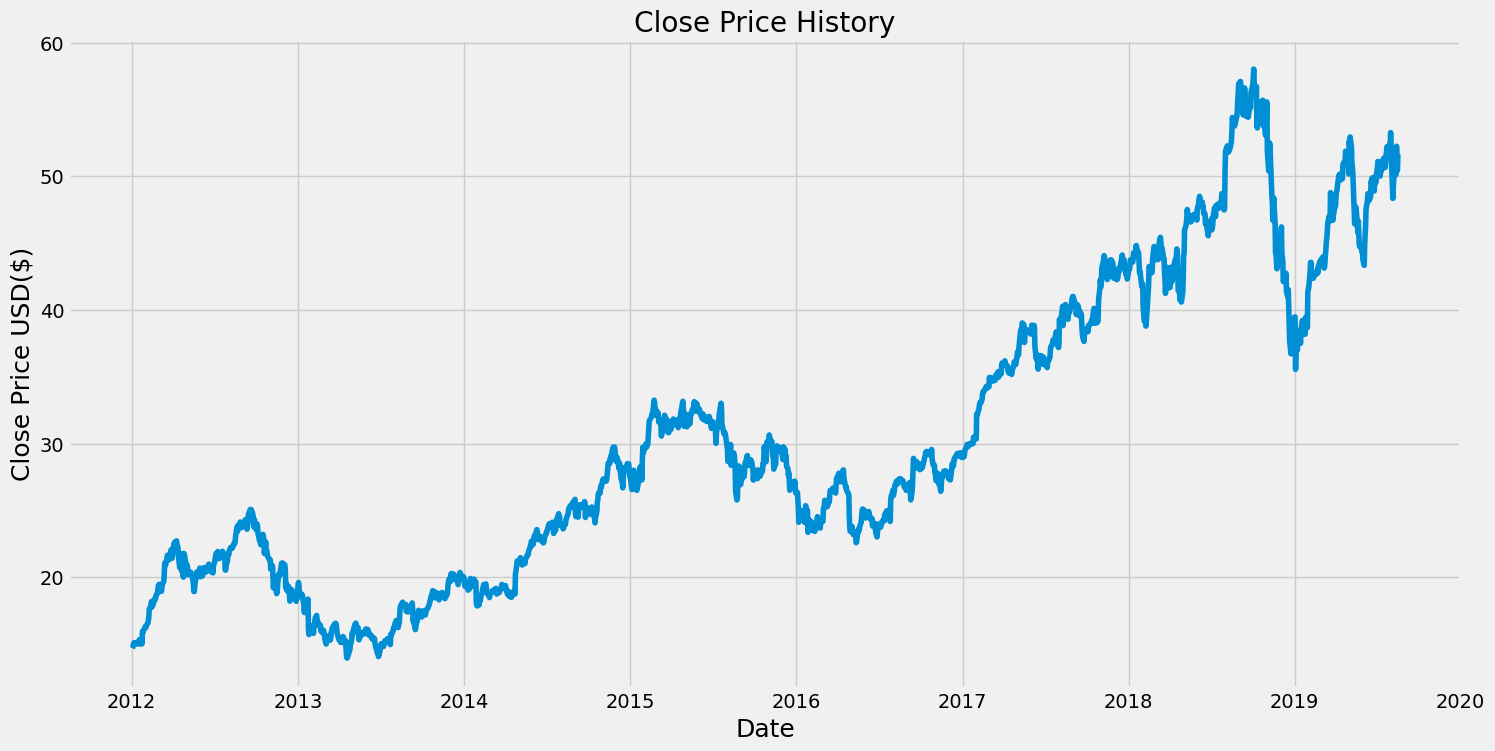

In [5]:
#Plotting the Historical Stock Prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [6]:
#Data Preprocessing
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1535

In [7]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.83367367],
       [0.82794418],
       [0.85494664]])

In [8]:
#Creating Training Data Sequences
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01677525, 0.01856622, 0.02228596, 0.02582741, 0.02528444,
       0.02650814, 0.02594896, 0.0250089 , 0.02372846, 0.02769133,
       0.0312652 , 0.03016305, 0.02412556, 0.02988751, 0.02421471,
       0.04548769, 0.04384259, 0.04599015, 0.05063372, 0.05344579,
       0.05321078, 0.05234367, 0.05603909, 0.05951568, 0.06345425,
       0.06981588, 0.08317935, 0.08338195, 0.09082143, 0.09638074,
       0.08682617, 0.09050536, 0.09043243, 0.10074882, 0.09928197,
       0.1019968 , 0.1068754 , 0.10959027, 0.11741061, 0.12310769,
       0.1247528 , 0.12532821, 0.11558723, 0.11323704, 0.11358553,
       0.12274305, 0.12532011, 0.13085515, 0.14390255, 0.16130993,
       0.15805211, 0.15806021, 0.17064572, 0.17458428, 0.17178026,
       0.16921943, 0.16655321, 0.17541084, 0.18148887, 0.18403351])]
[0.17774480420636363]

[array([0.01677525, 0.01856622, 0.02228596, 0.02582741, 0.02528444,
       0.02650814, 0.02594896, 0.0250089 , 0.02372846, 0.02769133,
       0.0312652 , 0.03016305, 0.02

In [9]:
#convert the x_train & y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1475, 60, 1)

In [11]:
#Building the LSTM Mode
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Training the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1475/1475 [==============================] - 68s 40ms/step - loss: 0.0015


In [14]:
#creating the testing data set
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
#convert the data to numpy arrays
x_test = np.array(x_test)

In [16]:
#reshape the data
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
#get predicted value
predictions=model.predict(x_test)

12/12 [==============================] - 2s 30ms/step


In [18]:
#denormalise
predictions=scaler.inverse_transform(predictions)

In [19]:
#Calculating RMSE
rmse=np.sqrt(np.mean((predictions-y_test)**2))
rmse

1.6239600607393987

C:\Users\madha\AppData\Local\Temp\ipykernel_10292\4195947378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


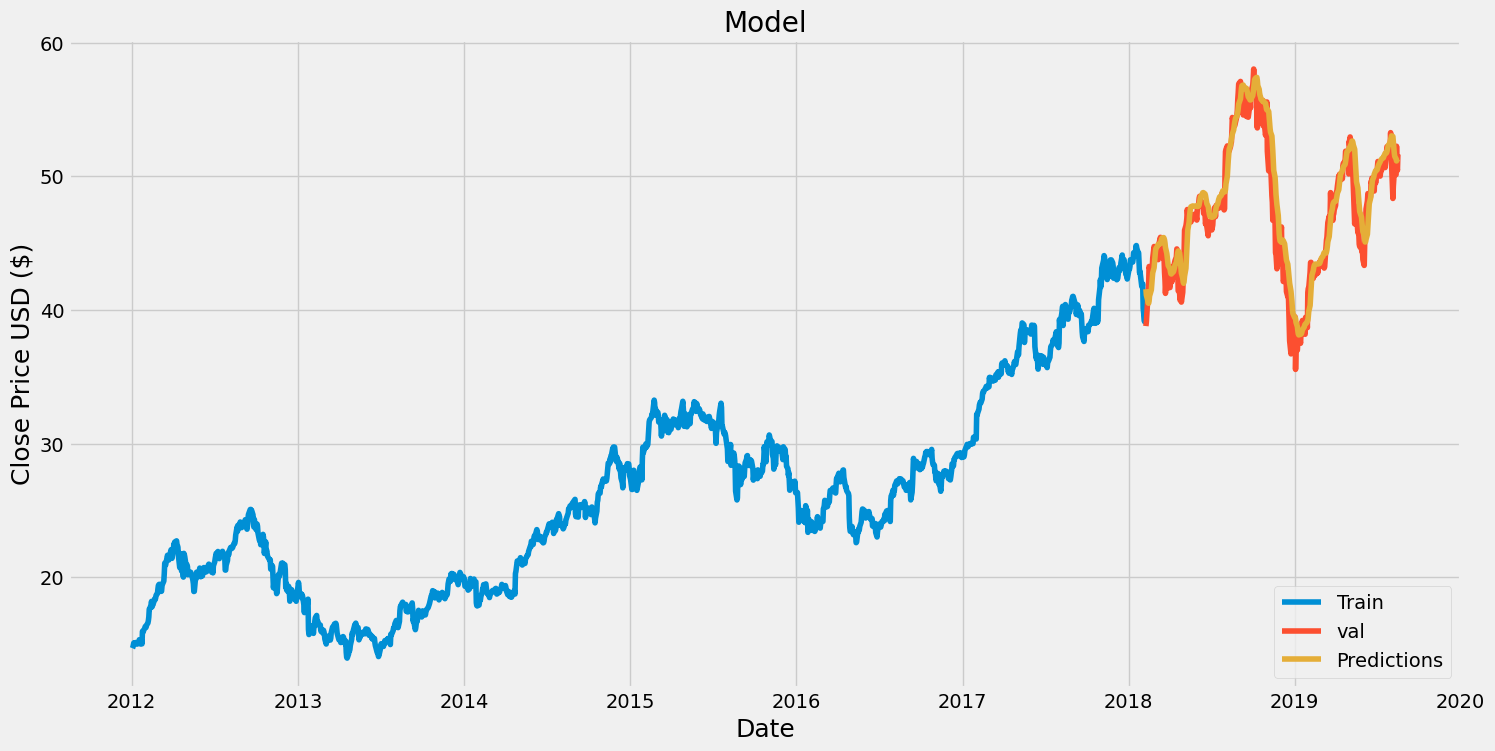

In [20]:
#Plotting Predictions
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='lower right')
plt.show()

In [21]:
 # ... (Previous code)

# Extend the time frame to include the next 30 days
df = yf.download('AAPL', start='2012-01-01', end='2020-01-17')  # Adjust the end date



[*********************100%%**********************]  1 of 1 completed


In [22]:
# Create a list of future dates for prediction
from datetime import datetime, timedelta

end_date = datetime(2020, 1, 17)  # Adjust to match the extended end date
future_dates = [end_date + timedelta(days=i) for i in range(1, 31)]  # 30 days ahead




In [23]:
# Data preprocessing
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# ... (Additional code)


In [24]:
# Generate sequences for the 30-day prediction period
x_future = []

for i in range(len(df) - 60, len(df)):
    x_future.append(scaled_data[i - 60:i, 0])

x_future = np.array(x_future)
x_future = np.reshape(x_future, (x_future.shape[0], x_future.shape[1], 1))




In [25]:
# Make predictions for the future
future_predictions = model.predict(x_future)
future_predictions = scaler.inverse_transform(future_predictions)

# ... (Plotting code, including future predictions)

2/2 [==============================] - 0s 27ms/step


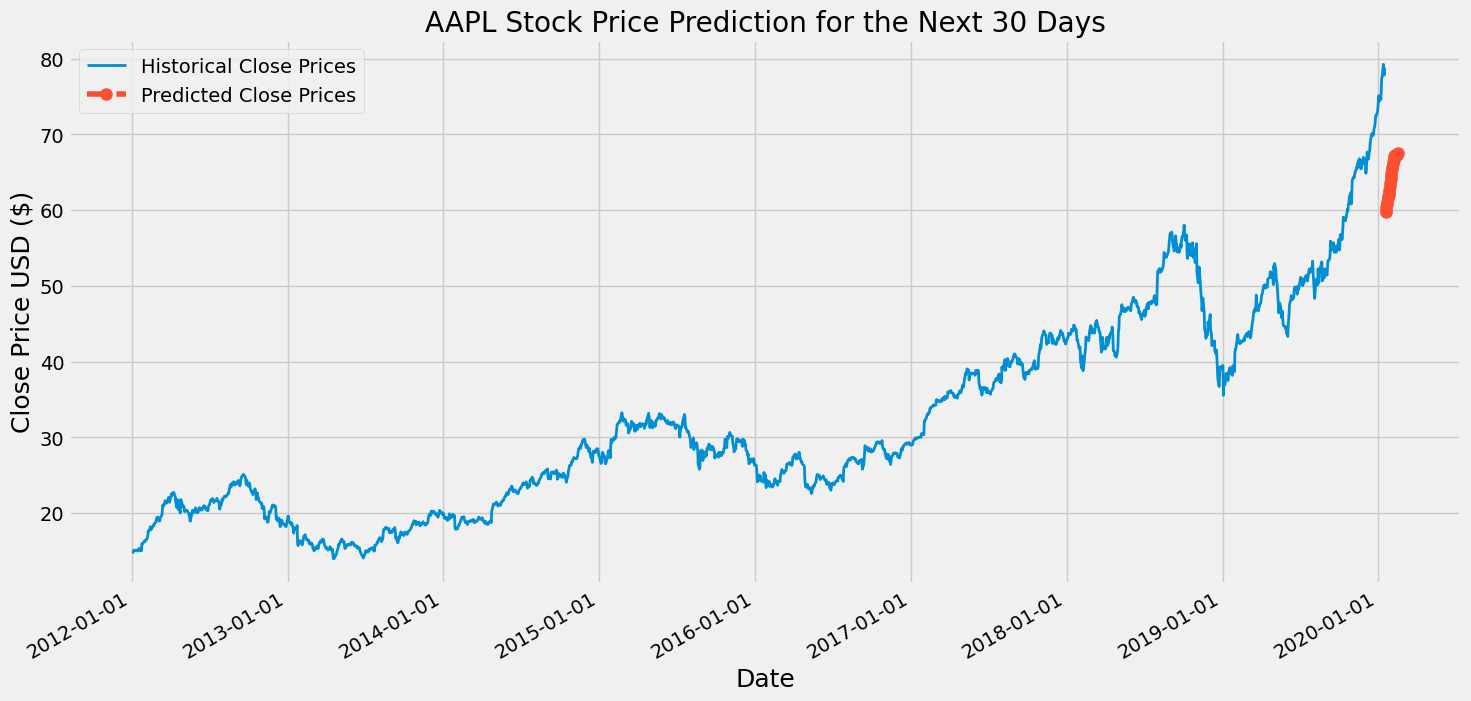

In [26]:
# ... (Previous code)

# Plotting code for predictions of the next 30 days
plt.figure(figsize=(16, 8))
plt.title('AAPL Stock Price Prediction for the Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot historical data
plt.plot(df.index, df['Close'], label='Historical Close Prices', linewidth=2)

# Plot only the predictions for the next 30 days
plt.plot(future_dates, future_predictions[:30], label='Predicted Close Prices', marker='o', markersize=8, linestyle='--')

plt.legend(loc='upper left')
plt.grid(True)

# Format the x-axis ticks with proper date labels
from matplotlib.dates import DateFormatter

date_formatter = DateFormatter('%Y-%m-%d')  # Format: Year-Month-Day
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gcf().autofmt_xdate()  # Automatically format date labels for better readability

plt.show()
